<a href="https://colab.research.google.com/github/sakuna47/Fuzzy_logic_CW/blob/Fuzzy_code/Fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.4 MB/s eta 0:00:00


In [2]:
# Define fuzzy variables
voltage_dev = ctrl.Antecedent(np.arange(0, 21, 1), 'Voltage Deviation (%)')
freq_var = ctrl.Antecedent(np.arange(0, 0.51, 0.01), 'Frequency Variation (Hz)')
load_imb = ctrl.Antecedent(np.arange(0, 31, 1), 'Load Imbalance (%)')
phase_mis = ctrl.Antecedent(np.arange(0, 31, 1), 'Phase Mismatch (degrees)')
severity = ctrl.Consequent(np.arange(0, 101, 1), 'Anomaly Severity')


In [3]:
# Define membership functions
voltage_dev['Low'] = fuzz.trimf(voltage_dev.universe, [0, 2.5, 5])
voltage_dev['Medium'] = fuzz.trimf(voltage_dev.universe, [3, 6.5, 10])
voltage_dev['High'] = fuzz.trimf(voltage_dev.universe, [8, 14, 20])

freq_var['Stable'] = fuzz.trimf(freq_var.universe, [0, 0.1, 0.2])
freq_var['Unstable'] = fuzz.trimf(freq_var.universe, [0.15, 0.325, 0.5])

load_imb['Balanced'] = fuzz.trimf(load_imb.universe, [0, 5, 10])
load_imb['Unbalanced'] = fuzz.trimf(load_imb.universe, [8, 19, 30])

phase_mis['Small'] = fuzz.trimf(phase_mis.universe, [0, 5, 10])
phase_mis['Large'] = fuzz.trimf(phase_mis.universe, [8, 19, 30])

severity['Low'] = fuzz.trimf(severity.universe, [0, 20, 40])
severity['Medium'] = fuzz.trimf(severity.universe, [30, 50, 70])
severity['High'] = fuzz.trimf(severity.universe, [60, 80, 100])

In [4]:
# Define fuzzy rules
rule1 = ctrl.Rule(voltage_dev['High'] & freq_var['Unstable'] & load_imb['Unbalanced'] & phase_mis['Large'], severity['High'])
rule2 = ctrl.Rule(voltage_dev['Low'] & freq_var['Stable'] & load_imb['Balanced'] & phase_mis['Small'], severity['Low'])
rule3 = ctrl.Rule(voltage_dev['Medium'] & freq_var['Stable'] & load_imb['Unbalanced'] & phase_mis['Small'], severity['Medium'])
rule4 = ctrl.Rule(voltage_dev['Low'] & freq_var['Stable'] & load_imb['Unbalanced'] & phase_mis['Small'], severity['Low'])
rule5 = ctrl.Rule(voltage_dev['High'] & freq_var['Unstable'] & load_imb['Balanced'] & phase_mis['Large'], severity['High'])
rule6 = ctrl.Rule(voltage_dev['Medium'] & freq_var['Unstable'] & load_imb['Balanced'] & phase_mis['Small'], severity['Medium'])
rule7 = ctrl.Rule(voltage_dev['Low'] & freq_var['Unstable'] & load_imb['Balanced'] & phase_mis['Large'], severity['Medium'])
rule8 = ctrl.Rule(voltage_dev['High'] & freq_var['Stable'] & load_imb['Balanced'] & phase_mis['Small'], severity['Medium'])
rule9 = ctrl.Rule(voltage_dev['Medium'] & freq_var['Stable'] & load_imb['Balanced'] & phase_mis['Small'], severity['Low'])
rule10 = ctrl.Rule(voltage_dev['Low'] & freq_var['Unstable'] & load_imb['Unbalanced'] & phase_mis['Large'], severity['Medium'])
rule11 = ctrl.Rule(voltage_dev['High'] & freq_var['Stable'] & load_imb['Unbalanced'] & phase_mis['Large'], severity['High'])
rule12 = ctrl.Rule(voltage_dev['Medium'] & freq_var['Unstable'] & load_imb['Unbalanced'] & phase_mis['Large'], severity['High'])
rule13 = ctrl.Rule(voltage_dev['High'] & phase_mis['Large'], severity['High'])  # New rule for phase mismatch

In [10]:
# Create control system
anomaly_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
anomaly_sim = ctrl.ControlSystemSimulation(anomaly_ctrl)

# Function to simulate and evaluate anomaly
def evaluate_anomaly(volt_dev, freq_dev, load_dev, phase_dev):
    if not (0 <= volt_dev <= 20 and 0 <= freq_dev <= 0.5 and 0 <= load_dev <= 30 and 0 <= phase_dev <= 30):
        raise ValueError("Input values out of defined ranges")
    anomaly_sim.input['Voltage Deviation (%)'] = volt_dev
    anomaly_sim.input['Frequency Variation (Hz)'] = freq_dev
    anomaly_sim.input['Load Imbalance (%)'] = load_dev
    anomaly_sim.input['Phase Mismatch (degrees)'] = phase_dev
    anomaly_sim.compute()
    severity_score = anomaly_sim.output['Anomaly Severity']

    # Determine mitigation action
    if severity_score > 60:
        action = "Isolate faulty section"
    elif severity_score > 30:
        action = "Balance loads dynamically"
    else:
        action = "Monitor without action"

    return severity_score, action

In [14]:
# Test cases
test_cases = [
    (2, 0.1, 5, 5),     # Normal operation
    (12, 0.4, 20, 20),  # Severe anomaly with phase shift
    (6, 0.2, 15, 8),    # Moderate anomaly
    (8, 0.3, 10, 15),   # Moderate anomaly with phase shift
    (20, 0.5, 30, 25),  # Extreme anomaly with phase shift
    (15, 0.2, 5, 20),   # Phase-specific anomaly
]

# Run test cases
print("Test Case Results:")
for i, (volt, freq, load, phase) in enumerate(test_cases, 1):
    score, action = evaluate_anomaly(volt, freq, load, phase)
    print(f"Test {i}: Voltage={volt}%, Frequency={freq}Hz, Load={load}%, Phase={phase}°")
    print(f"Severity Score: {score:.2f}, Action: {action}\n")


Test Case Results:
Test 1: Voltage=2%, Frequency=0.1Hz, Load=5%, Phase=5°
Severity Score: 20.00, Action: Monitor without action

Test 2: Voltage=12%, Frequency=0.4Hz, Load=20%, Phase=20°
Severity Score: 80.00, Action: Isolate faulty section

Test 3: Voltage=6%, Frequency=0.2Hz, Load=15%, Phase=8°
Severity Score: 80.00, Action: Isolate faulty section

Test 4: Voltage=8%, Frequency=0.3Hz, Load=10%, Phase=15°
Severity Score: 80.00, Action: Isolate faulty section

Test 5: Voltage=20%, Frequency=0.5Hz, Load=30%, Phase=25°
Severity Score: 80.00, Action: Isolate faulty section

Test 6: Voltage=15%, Frequency=0.2Hz, Load=5%, Phase=20°
Severity Score: 80.00, Action: Isolate faulty section



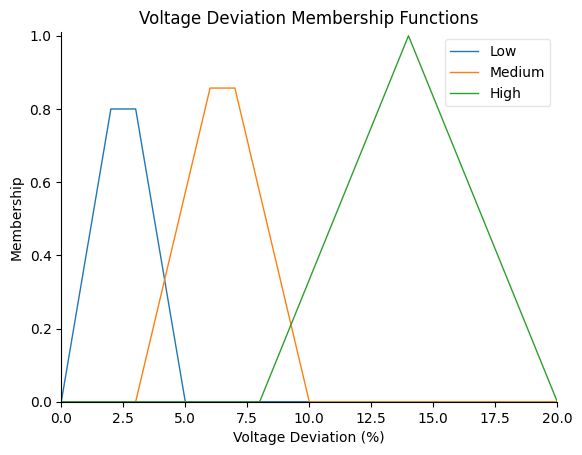

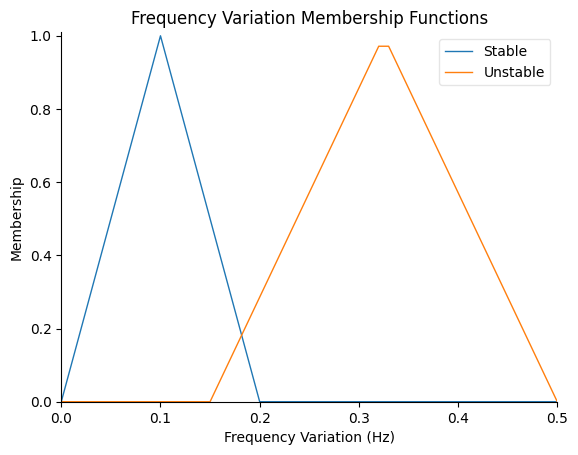

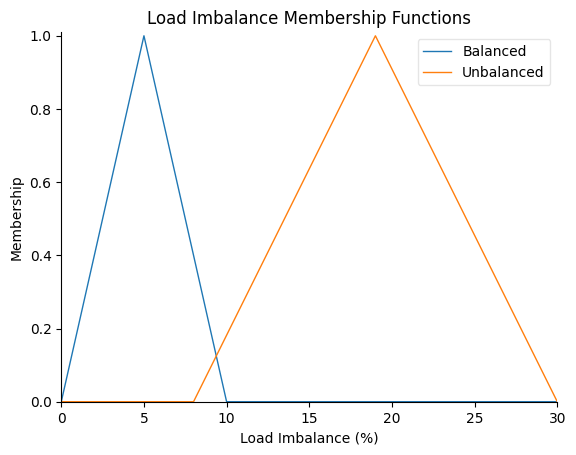

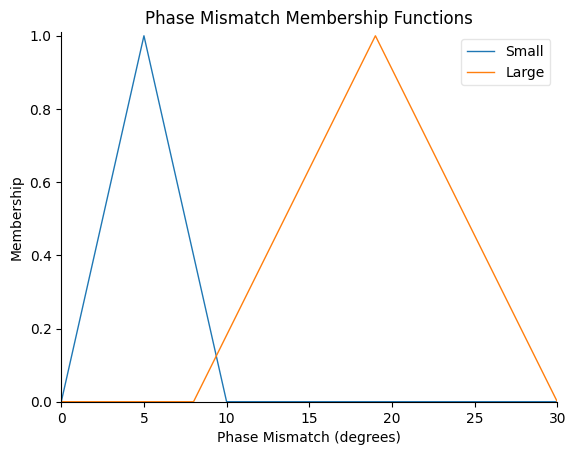

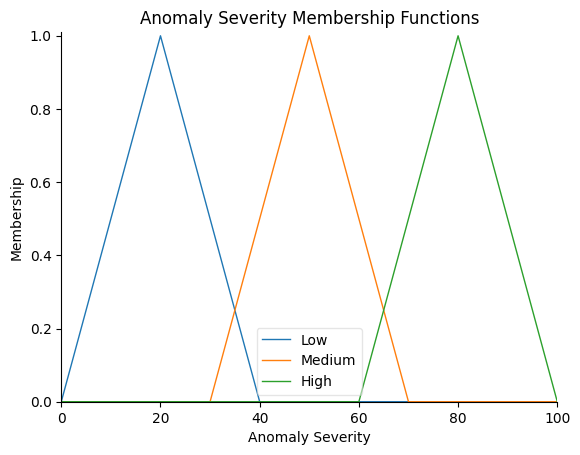

In [15]:


# Visualize membership functions
voltage_dev.view()
plt.title("Voltage Deviation Membership Functions")
plt.show()

freq_var.view()
plt.title("Frequency Variation Membership Functions")
plt.show()

load_imb.view()
plt.title("Load Imbalance Membership Functions")
plt.show()

phase_mis.view()
plt.title("Phase Mismatch Membership Functions")
plt.show()

severity.view()
plt.title("Anomaly Severity Membership Functions")
plt.show()